In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('btc-eth-prices-outliers.csv', 
              index_col=0,
              parse_dates=True)
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

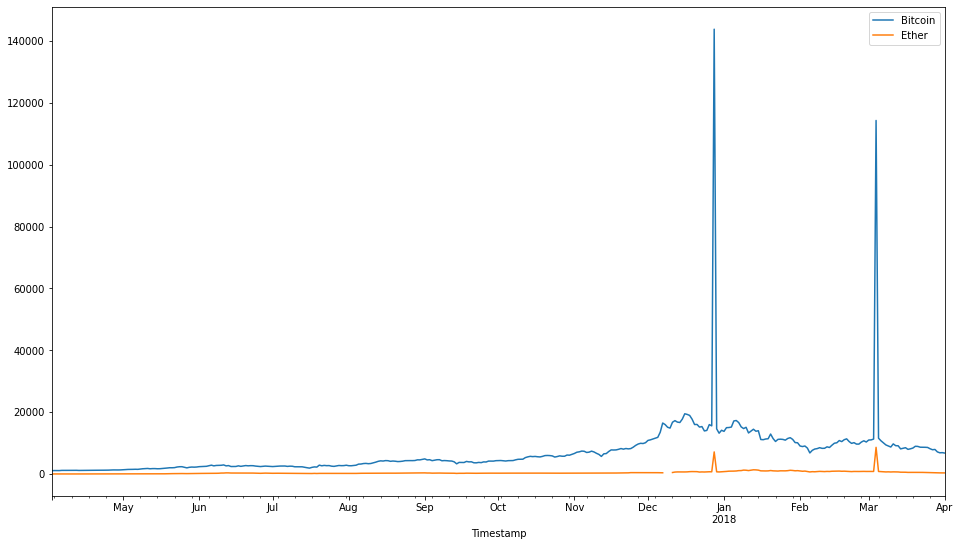

In [4]:
df.plot(figsize = (16, 9))

<AxesSubplot:xlabel='Timestamp'>

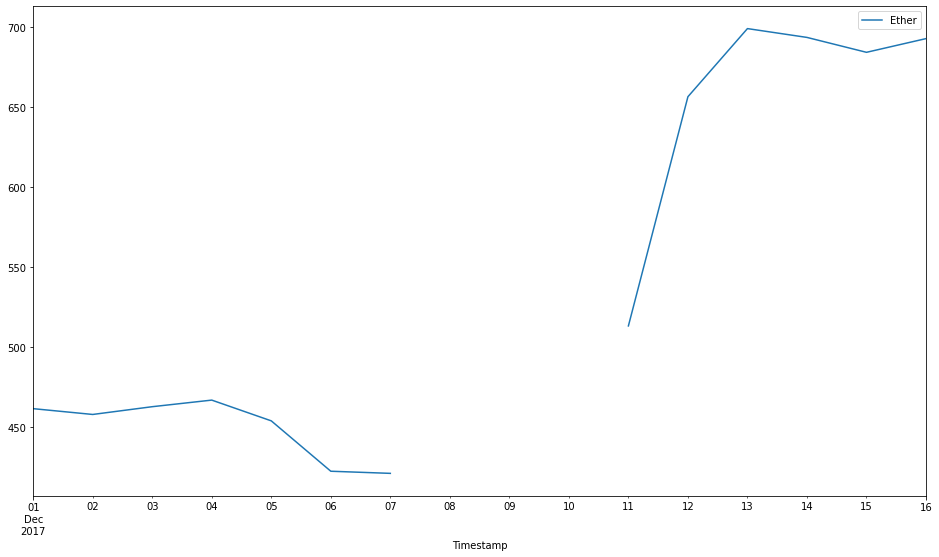

In [5]:
df.loc['2017-12':'2017-12-16'].plot(y='Ether', figsize=(16, 9))

In [6]:
df_na = df.loc['2017-12':'2017-12-16']
df_na['Ether'].isna().values.any()

True

In [7]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [8]:
df.loc['2017-12-06':'2017-12-16']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09
2017-12-14,16678.892000,693.58


In [9]:
df.loc['2017-12-06':'2017-12-16'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52
2017-12-13,16808.366667,699.09
2017-12-14,16678.892000,693.58


In [10]:
df.fillna(method='bfill', inplace=True)

<AxesSubplot:xlabel='Timestamp'>

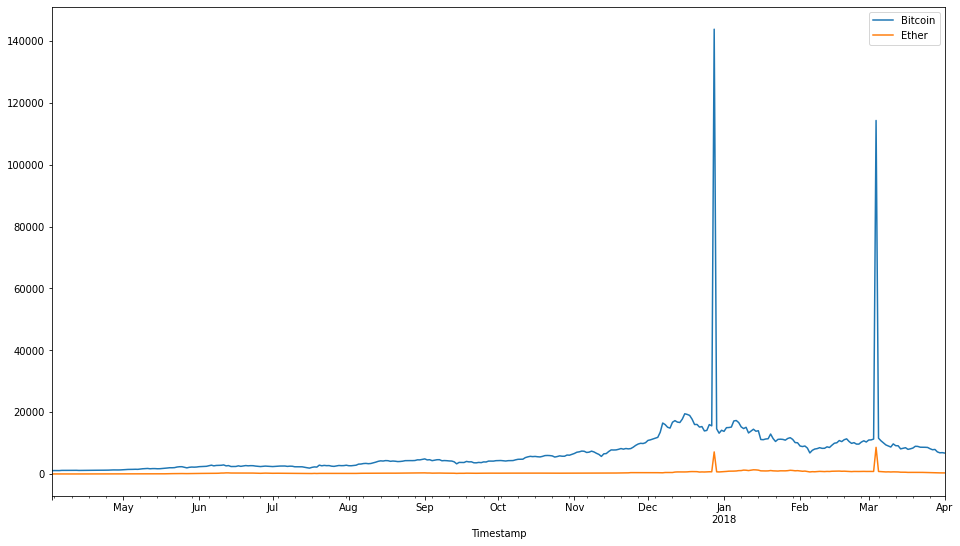

In [11]:
df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

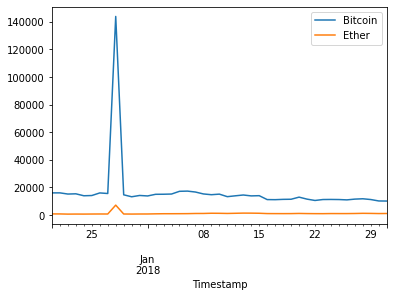

In [12]:
df['2017-12-20':'2018-01'].plot()

<AxesSubplot:xlabel='Timestamp'>

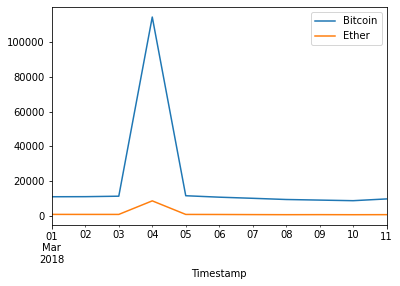

In [13]:
df['2018-03':'2018-03-11'].plot()


<AxesSubplot:xlabel='Timestamp'>

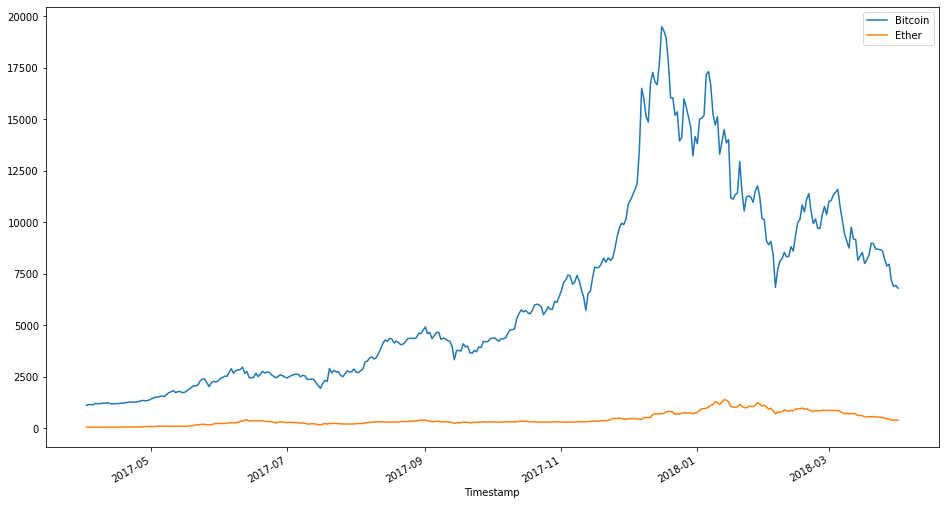

In [14]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
df_cleaned.plot(figsize=(16, 9))

### Central Tendency

In [15]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [16]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [17]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [18]:
df.mode()

,Bitcoin,Ether
0,1099.169125,513.29
1,1133.079314,NaN
2,1141.600363,NaN
3,1141.813000,NaN
4,1180.023713,NaN
...,...,...
360,18961.856667,NaN
361,19289.785000,NaN
362,19498.683333,NaN
363,114301.816667,NaN


# Visualizing distribution

<AxesSubplot:ylabel='Frequency'>

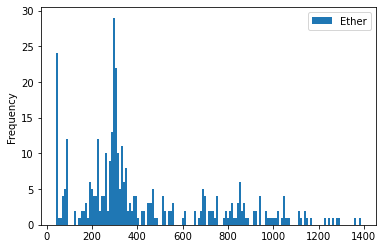

In [19]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

<AxesSubplot:ylabel='Frequency'>

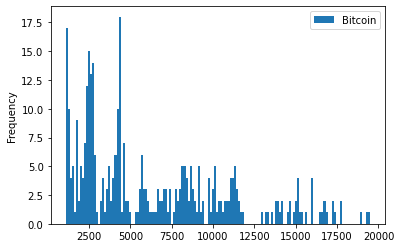

In [20]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

<AxesSubplot:xlabel='Ether', ylabel='Count'>

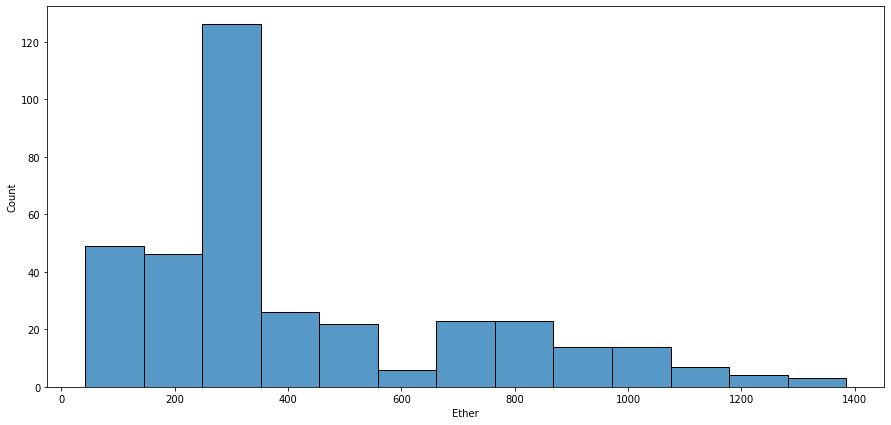

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
sb.histplot(df_cleaned['Ether'], ax=ax)

<AxesSubplot:xlabel='Bitcoin', ylabel='Count'>

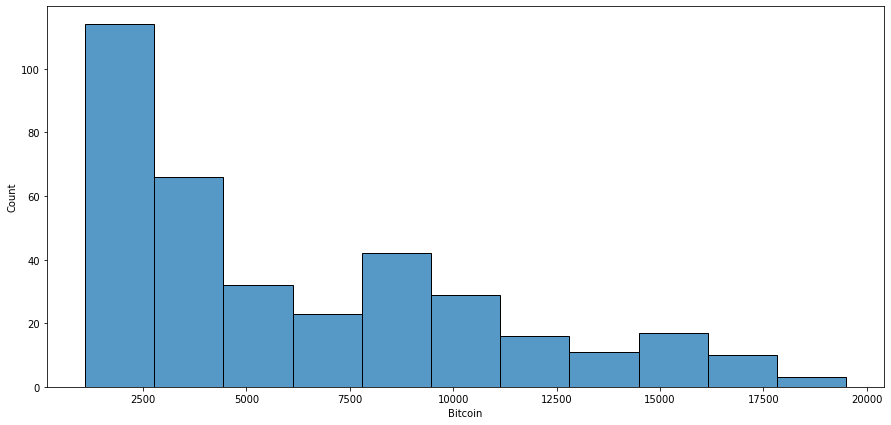

In [28]:
fig, ax = plt.subplots(figsize=(15, 7))
sb.histplot(df_cleaned['Bitcoin'])

<AxesSubplot:xlabel='Ether', ylabel='Density'>

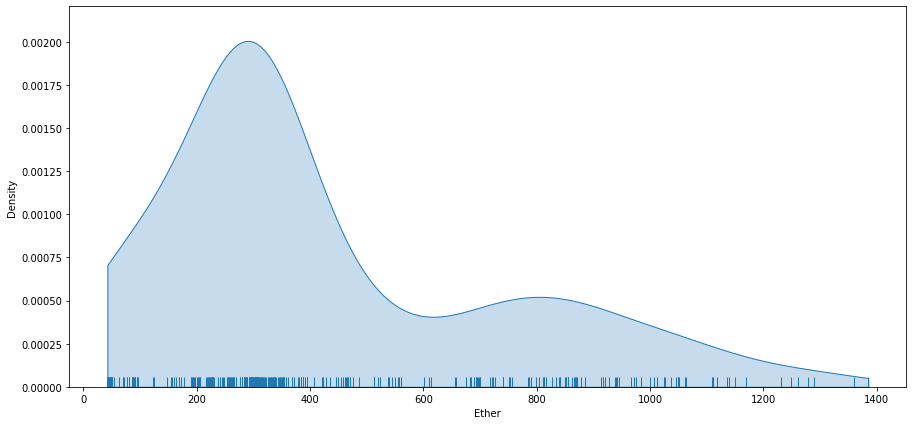

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
sb.kdeplot(df_cleaned['Ether'], shade = True, ax=ax, cut=0)
sb.rugplot(df_cleaned['Ether'], ax=ax)